# Sheet 05

* all the variouse modules and packages that might be required for this sheet

In [16]:
from numpy.typing import NDArray  # trying to be typesafe
import numpy as np  # needed all over the place
from IPython.display import HTML # in line animations

import os   # file and file path

from itertools import count
import pandas as pd
import matplotlib.pyplot as plt  # for plots

from matplotlib import colors  # not quite sure what fore
from matplotlib.ticker import PercentFormatter  # also not sure, maybe animation..?
from matplotlib.animation import FuncAnimation, FFMpegWriter  # for animations

### Random walk

The random walk, is simple. So the easiest way to implement is by a simple for loop with short initiation process. 

In [ ]:
N=20000  # number of iteration steps

number_of_particles=10000  # number of particles

x = np.zeros((N+1,number_of_particles),dtype=int) # contains all positions for all time steps

# for loop to simulate a random walk
for i in range(N):
    
    dw= np.random.uniform(low=0.0,high=1.0,size=number_of_particles)  # here we draw from a uniform random distribution between 0 and 1 for all particles
    
    dw = np.where(dw<0.5, -1,1)  # here we condition the list of random variables and out put a list of 0 || 1
    
    x[i+1,:]= x[i]+dw  # then the position get iterated

In the next few snippets of code I plot the sulutions of the variouse stepps 

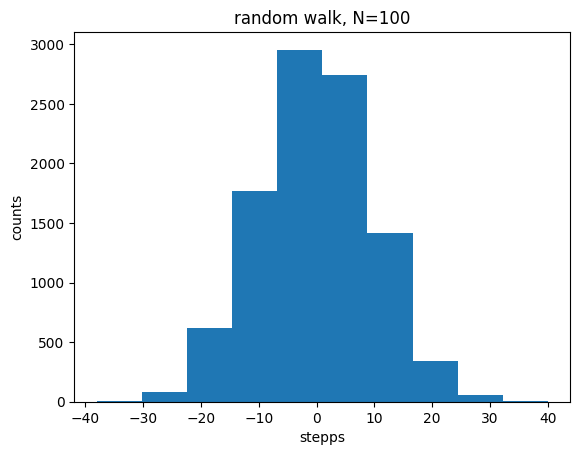

In [ ]:
plt.title("random walk, N=100")
plt.hist(x[100])
plt.ylabel("counts")
plt.xlabel("stepps")
plt.savefig("RW_N100.png")
plt.show()
plt.close()

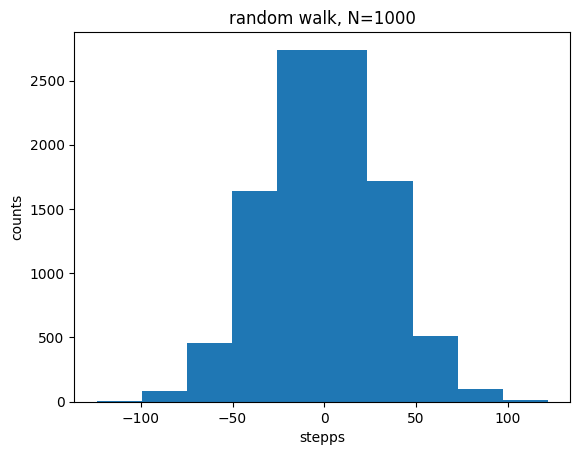

In [ ]:
plt.title("random walk, N=1000")
plt.hist(x[1000])
plt.ylabel("counts")
plt.xlabel("stepps")
plt.savefig("RW_N1000.png")
plt.show()
plt.close()

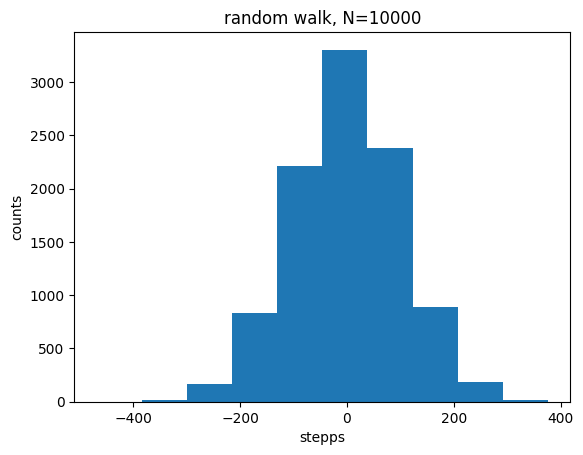

In [ ]:
plt.title("random walk, N=10000")
plt.hist(x[10000])
plt.ylabel("counts")
plt.xlabel("stepps")
plt.savefig("RW_N10000.png")
plt.show()
plt.close()

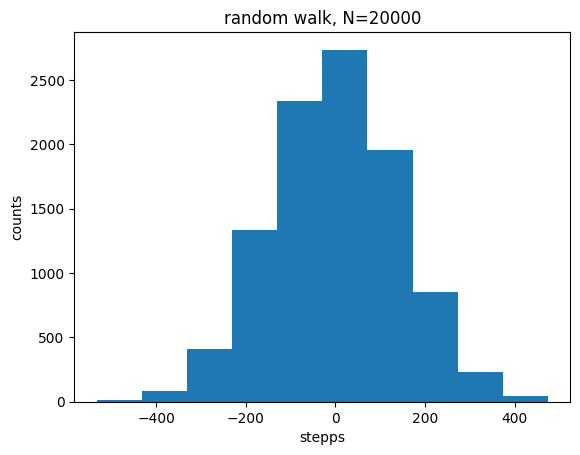

In [ ]:
plt.title("random walk, N=20000")
plt.hist(x[20000])
plt.ylabel("counts")
plt.xlabel("stepps")
plt.savefig("RW_N20000.png")
plt.show()
plt.close()

### particles in a reflective Box

* first off we need to simulate

In [ ]:
class Particle:
    def __init__(
        self,
        number: int,
        mass: float | int,
        radius: float | int,
        dimensions: int
    ):
        self.n: int = number
        self.m: float = float(mass)
        self.d: int = dimensions
        self.r: float = radius

        self.x: NDArray[np.float64]= np.zeros((dimensions,number))
        self.v: NDArray[np.float64]= np.zeros((dimensions,number))
        self.a1: NDArray[np.float64]= np.zeros((dimensions,number))
        self.a2: NDArray[np.float64]= np.zeros((dimensions,number))
        
    def __repr__(self):
        return f"This is a particle at {self.x[0]}, {self.y[0]} with v={self.vx[0]},{self.vy[0]} interacting by Lennard-Jones potential."

* boundry conditions: reflecting

In [ ]:
def reflecting_boundry_conditions(
        particle :Particle,
        box: tuple[float|int,float|int]
        ) -> None:
    """
    Reflecs particles on the boundries given by the box.

    Parameters:

        particle: (Particle)
                -> particles of the simulation

        box: (tuple[number, number])
                -> box in which the particles are kept 
    """
    for dim in range(particle.d):
            # Reflect particles crossing lower bound
            particle.x[dim, :] = np.where(
                    particle.x[dim, :] < box[0],
                    2 * box[0] - particle.x[dim, :],
                    particle.x[dim, :]
                )
            particle.v[dim, :] = np.where(
                    particle.x[dim, :] < box[0],
                    -particle.v[dim, :],
                    particle.v[dim, :]
                )

            # Reflect particles crossing the upper bound
            particle.x[dim, :] = np.where(
                    particle.x[dim, :] > box[1],
                    2 * box[1] - particle.x[dim, :],
                    particle.x[dim, :]
                )
            particle.v[dim, :] = np.where(
                    particle.x[dim, :] > box[1],
                    -particle.v[dim, :],
                    particle.v[dim, :]
                )
    pass



In [ ]:
box = (10,10)  # nm


(array([0, 0, 0]), array([0, 1, 2]))
